# Jake Graham
### GEOS 518
### HW1

# Load libraries 

In [1]:
import numpy as np # for math and stuff..
import pandas as pd # cause who doesn't like pandas... (read .csv)
import matplotlib.pyplot as plt # for plotting..
import scipy as sp # Need this and the below line to get functions to work
from scipy import signal # Has linear model function and one for detrending time series

# 1. Import data and plot. These data are dissolved oxygen (mg/L) and temperature (c) for the Tamarac River MN for the spring/summer of 2016.

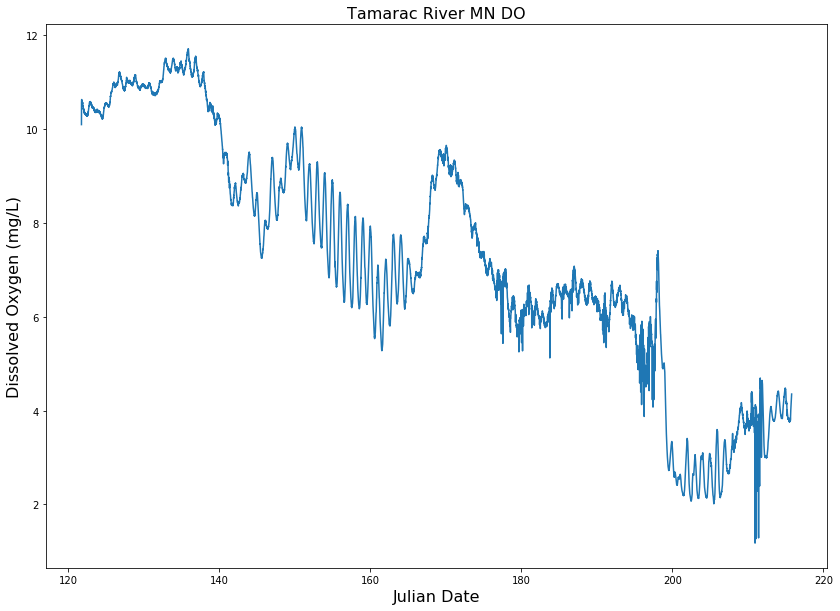

In [2]:
# Import data. 
df = pd.read_csv("TAM_DO_TEMP_SITE2.csv", sep=',')
# Create time series plot of DO concentrations as a function of Julian Date
plt.figure(figsize=(14,10))
plt.plot(df['Julian_Date'],df['DO']) 
plt.title('Tamarac River MN DO',fontsize=16)
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.show()

# 2. Generate summary stats and histogram

### Sumary stats

In [3]:
# Output summary statistics
df.describe()

,time,bat,temp,DO,Q,day,Julian_Date
count,9.026000e+03,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000
mean,1.463252e+09,3.461544,11.677981,7.272307,0.985782,16935.790449,168.790449
std,2.345460e+06,0.034739,6.138028,2.573972,0.001867,27.146533,27.146533
min,1.459191e+09,3.390000,0.084000,1.176000,0.949000,16888.780556,121.780556
25%,1.461221e+09,3.440000,6.500000,5.923250,0.984000,16912.283160,145.283160
50%,1.463253e+09,3.470000,13.230000,7.017000,0.986000,16935.794097,168.794097
75%,1.465283e+09,3.490000,16.898000,9.260750,0.987000,16959.296701,192.296701
max,1.467314e+09,3.510000,22.396000,11.713000,0.989000,16982.799306,215.799306


### Histogram of DO from the Tamarac River

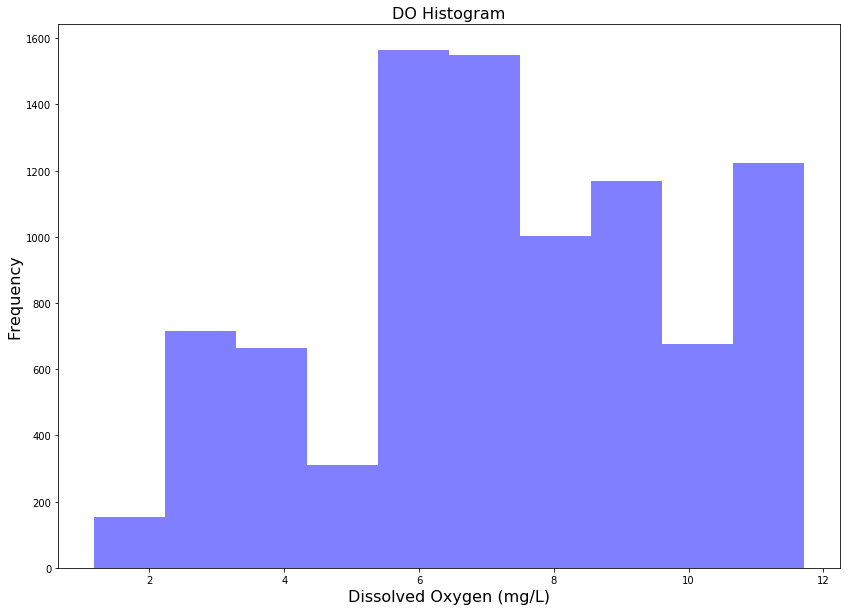

In [4]:
# Create histogram of Dissolved Oxygen concentrations (mg/L)
plt.figure(figsize=(14,10))
plt.hist(df['DO'], facecolor='blue', alpha=0.5)
plt.title('DO Histogram',fontsize=16)
plt.xlabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

# 3. Create linear model to investiage stationarity

In [5]:
# Create linear model and predicted DO values
slope, yint, r, p, ster = sp.stats.linregress(df['Julian_Date'],df['DO'])
lm = yint + slope*df['Julian_Date']

### Slope 

In [6]:
slope

-0.086862796194287439

### p

In [7]:
p

0.0

### Yes, there is a significant trend.

### Create plot of the time series with the linear model

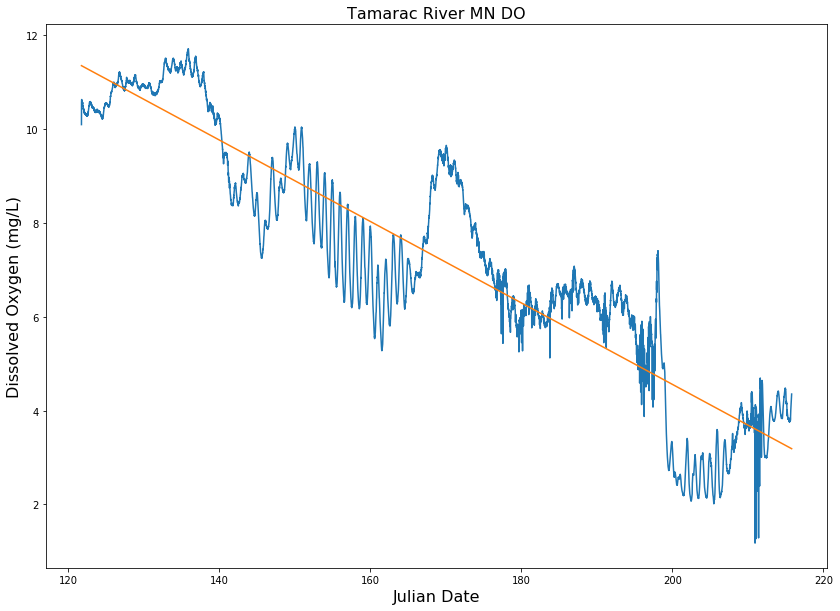

In [8]:
# Create time series plot of DO concentrations as a function of Julian Date, with the linear model displayed
plt.figure(figsize=(14,10))
plt.plot(df['Julian_Date'],df['DO']) 
plt.plot(df['Julian_Date'],lm)
plt.title('Tamarac River MN DO',fontsize=16)
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.show()

# 4. Detrend data and investigate autocorrelation

### Create plot of detreneded DO

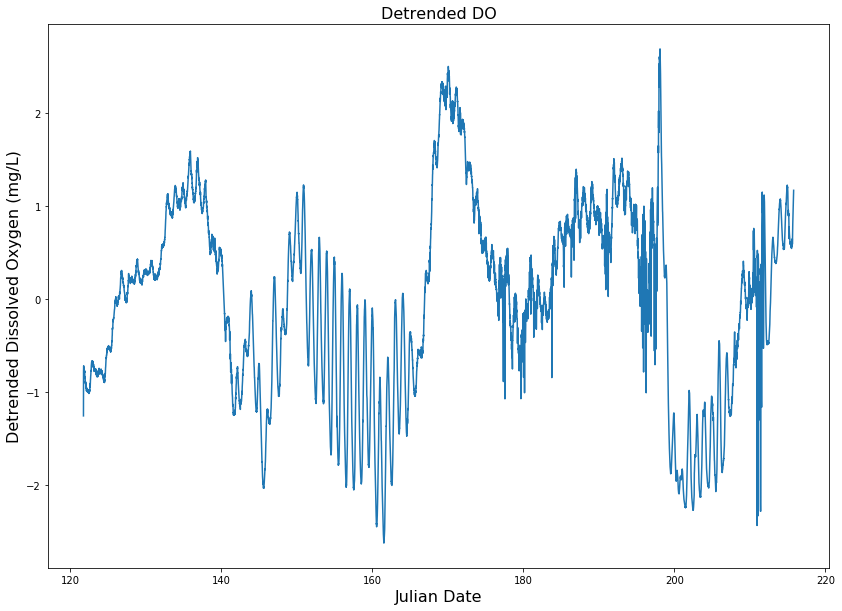

In [9]:
# Create plot of detrended DO as a function of Julian Date
plt.figure(figsize=(14,10))
plt.plot(df['Julian_Date'], signal.detrend(df['DO'])) 
plt.title('Detrended DO',fontsize=16)
plt.ylabel('Detrended Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.show()

### Plot DO at hour h against DO at hour h-1

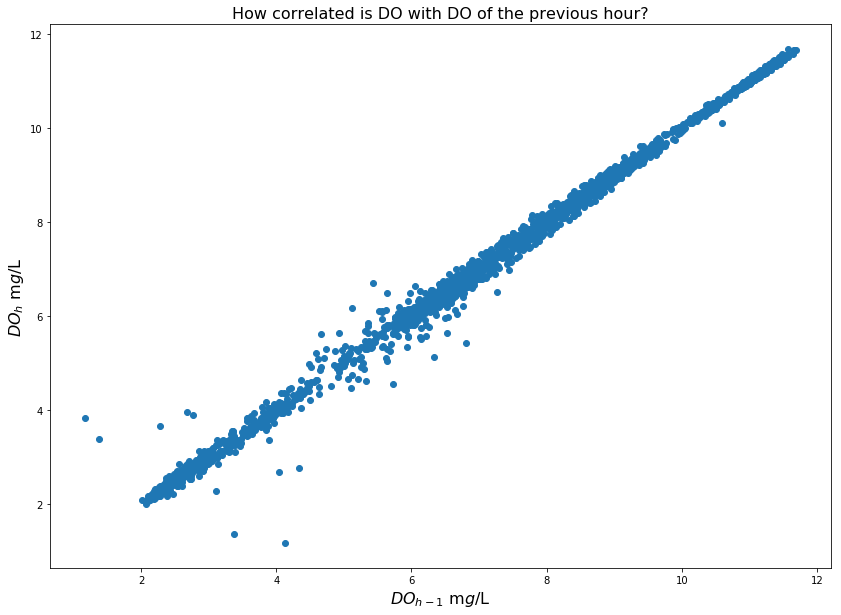

In [10]:
# Extract DO measurements 1 hour apart
D = df['DO'].values[np.arange(0, len(df['DO']), 4)] # extract every fourth element (15 min sampling interval, 4th = hourly data)
# extract 2nd - last observation (this hour's DO)
Dt = D[1:-1] 
# extract 1st - 2nd to last observation (previous hour's DO)
Dtm1 = D[0:-2]

# Plot DO at t 
plt.figure(figsize=(14,10))
plt.plot(Dt,Dtm1,'o')
plt.title('How correlated is DO with DO of the previous hour?',fontsize=16)
plt.xlabel('$DO_{h-1}$ m$g$/L',fontsize=16)
plt.ylabel('$DO_h$ m$g$/L',fontsize=16)
plt.show()

### Pretty correlated.. R = 

In [11]:
R = np.corrcoef(Dtm1,Dt)
R[1,0]

0.99729700826950496

### Plot DO at day d against DO at day d-1

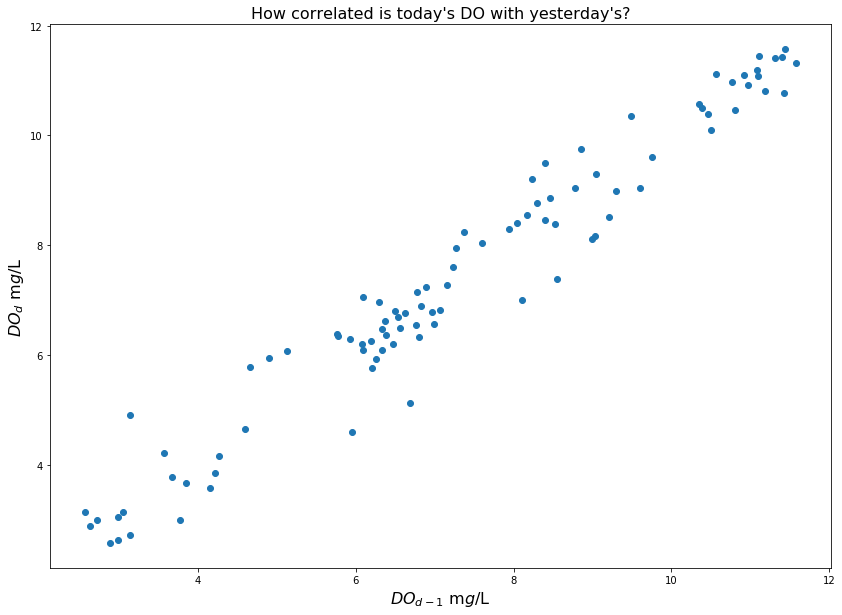

In [12]:
# Extract DO measurements 24 hours apart
D2 = df['DO'].values[np.arange(0, len(df['DO']), np.int(round(1/(df['Julian_Date'][1] - df['Julian_Date'][0]),0)))] # ugly portion here finds the number of samples per day
# extract 2nd - last observation (today's DO)
Dt2 = D2[1:-1] 
# extract 1st - 2nd to last observation (yesterday's DO)
Dtm2 = D2[0:-2]

# Plot DO at day d and day d-1 
plt.figure(figsize=(14,10))
plt.plot(Dt2,Dtm2,'o')
plt.title('How correlated is today\'s DO with yesterday\'s?',fontsize=16)
plt.xlabel('$DO_{d-1}$ m$g$/L',fontsize=16)
plt.ylabel('$DO_d$ m$g$/L',fontsize=16)
plt.show()

### Still pretty correlated, but less so.. R = 

In [13]:
R = np.corrcoef(Dtm2,Dt2)
R[1,0]

0.97557188423052787

### Generate and plot autocorrelation function from 1-24 hour time lags

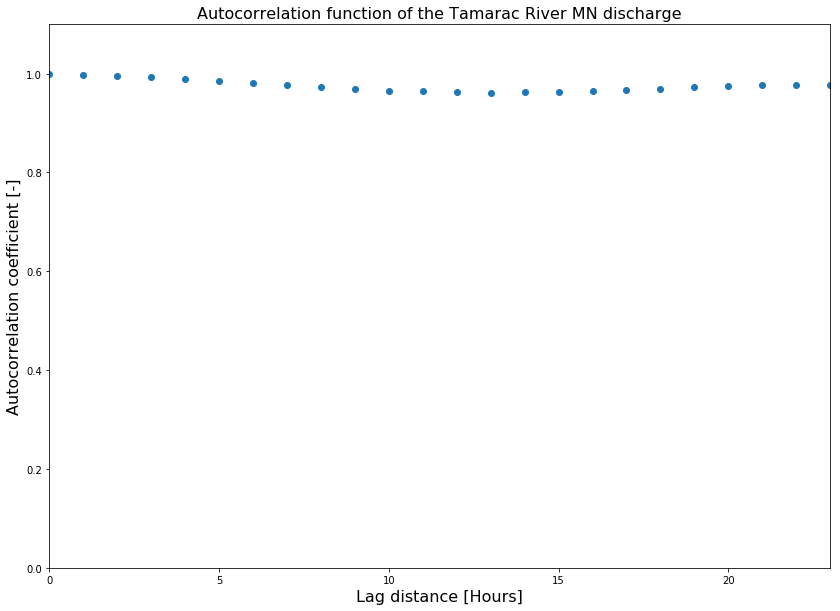

In [14]:
# max lag, and create empty container
Nk = 24
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

# fill in coefficients
for k in K:
    Dt   = D[k:-1] 
    Dtmk = D[0:-(1+k)]
    R = np.corrcoef(Dtmk,Dt)
    Rk[k] = R[1,0]

# create plot of AC function
plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of the Tamarac River MN discharge',fontsize=16)
plt.xlabel('Lag distance [Hours]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

### Generate and plot autocorrelation coefficients for time lags of 1:420 hours (30 days)

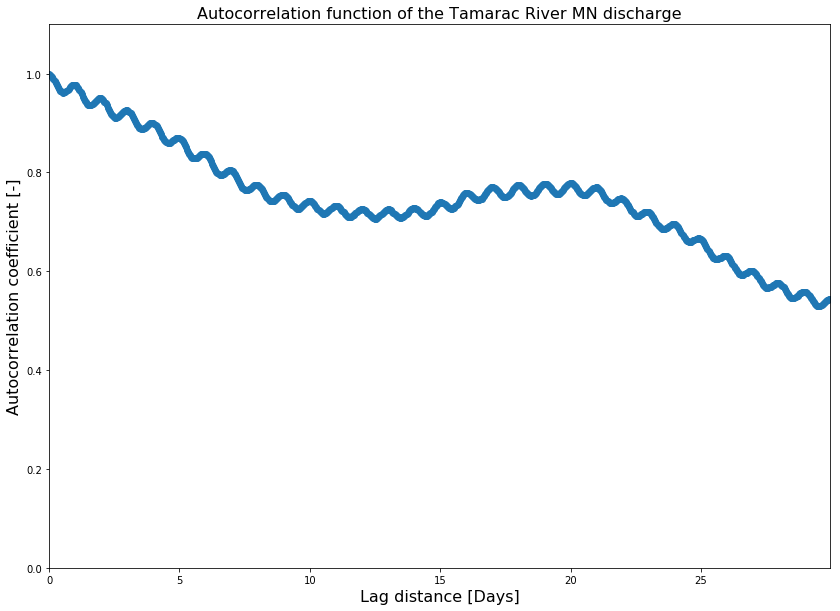

In [15]:
# generate autocorrelation coefficients for 1:420 hours (30 days)
Nk = 24*30
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    Dt   = D[k:-1] 
    Dtmk = D[0:-(1+k)]
    R = np.corrcoef(Dtmk,Dt)
    Rk[k] = R[1,0]


plt.figure(figsize=(14,10))
plt.plot(K/24,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)/24))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of the Tamarac River MN discharge',fontsize=16)
plt.xlabel('Lag distance [Days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

# 5. Results & Analysis

#### These data provide evidence to suggest there is a strong diel oscillation in DO concentration, which can be seen in the orignial signal and the sinusodal oscillations occuring in the plot of autocorrelation as a function of time lag (characteristic frequency of once per day). This pattern is likely attributed to the ability (day) and inability (night) of aquatic autotrophs to photosynthesize. The trend of DO to decrease through time is likely due to the inverse relationship between temperature and DO. These sensors were deployed in the early spring when temperatures were low and progressively warmed through the time series. See below. Large spikes in DO/temp are likely due to large rain events (e.g., @ julian date ~ 170).

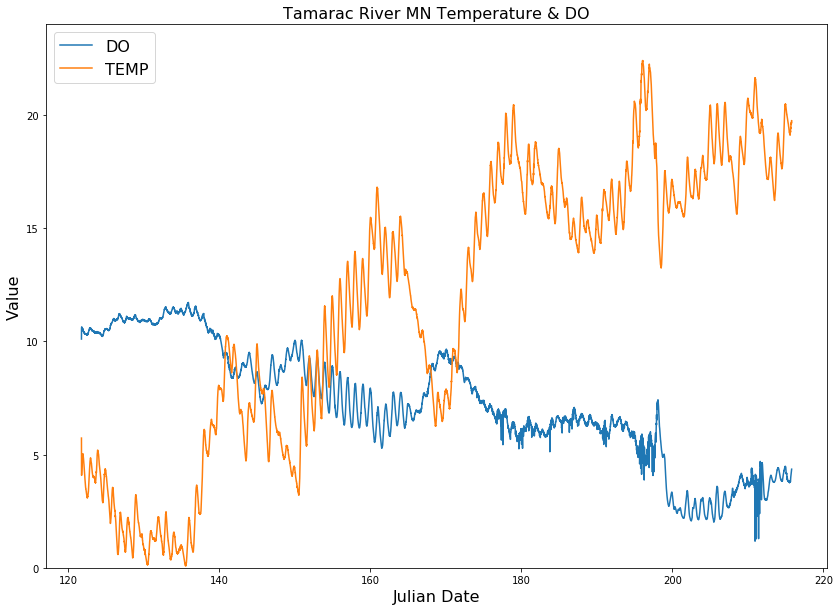

In [16]:
plt.figure(figsize=(14,10))
plt.plot(df['Julian_Date'],df['DO']) 
plt.plot(df['Julian_Date'],df['temp']) 
plt.title('Tamarac River MN Temperature & DO',fontsize=16)
plt.ylabel('Value',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.ylim(0.0,24)
plt.legend(('DO', 'TEMP'), fontsize = 16)
plt.show()